In [3]:
import os
import fitz  # PyMuPDF
import nltk
import numpy as np
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer, util

nltk.download('punkt')

# Initialize the LegalBERT-based SentenceTransformer model
model = SentenceTransformer('nlpaueb/legal-bert-base-uncased')

def pdf_to_text(file_path):
    """Extract text from a PDF file."""
    text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

def split_into_passages(text, window_size=5, stride=2):
    """
    Split text into overlapping passages.
    Each passage contains 'window_size' sentences, and the window moves by 'stride' sentences.
    """
    sentences = sent_tokenize(text)
    passages = []
    for i in range(0, len(sentences), stride):
        passage = ' '.join(sentences[i:i + window_size])
        if passage:
            passages.append(passage)
        if i + window_size >= len(sentences):
            break
    return passages

def semantic_search(folder_path, query, top_k=3):
    """
    Perform semantic search over legal documents in the specified folder.
    Returns the top_k passages most relevant to the query.
    """
    results = []

    # Encode the query once
    query_embedding = model.encode(query, convert_to_tensor=True)

    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.pdf'):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            passages = split_into_passages(text)

            # Encode all passages
            passage_embeddings = model.encode(passages, convert_to_tensor=True)

            # Compute cosine similarities
            cosine_scores = util.cos_sim(query_embedding, passage_embeddings)[0]

            # Retrieve top_k passages
            top_results = np.argpartition(-cosine_scores, range(top_k))[:top_k]

            for idx in top_results:
                results.append({
                    'document': filename,
                    'passage': passages[idx],
                    'score': float(cosine_scores[idx])
                })

    # Sort all results by score
    results = sorted(results, key=lambda x: x['score'], reverse=True)

    return results[:top_k]

# Example usage
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"  # Replace with your folder path
    query = input("Enter your legal query: ").strip()
    top_passages = semantic_search(folder, query, top_k=5)

    for idx, result in enumerate(top_passages, 1):
        print(f"\nResult {idx}:")
        print(f"Document: {result['document']}")
        print(f"Relevance Score: {result['score']:.4f}")
        print(f"Passage:\n{result['passage']}")


D:\Anaconda\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No sentence-transformers model found with name nlpaueb/legal-bert-base-uncased. Creating a new one with mean pooling.


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

D:\Anaconda\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\JYOTHSNA V\.cache\huggingface\hub\models--nlpaueb--legal-bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Enter your legal query: Users must give explicit consent before personal data collection.

Result 1:
Document: Nigeria_DPA.pdf
Relevance Score: 0.9093
Passage:
vi. Any residue of data that is not needed should be properly destroyed or irreversibly 
de-identified. vii. A data controller or data processor is under obligation to communicate its data 
retention policy to data subjects. The information to data subject in respect of data 
retention must clearly indicate the implication for Data Subject’s Access Request 
(DSAR).

Result 2:
Document: LGPD _Brazil.pdf
Relevance Score: 0.9043
Passage:
Paragraph 3. It is prohibited to process personal data if the consent is defective. Paragraph 4. The consent shall refer to specific purposes, and generic authorizations for 
the processing of personal data shall be considered void. Paragraph 5.

Result 3:
Document: LGPD _Brazil.pdf
Relevance Score: 0.9001
Passage:
For purposes of this Law, data used to formulate a behavioral profile of a 
particul

In [2]:
!pip install sentence-transformers


[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query: The impact of cross-border or foreign influence on data extraction.

📄 File: GDPR_EU.pdf
🔍 Relevance Score (GloVe cosine similarity): 0.9473
🧠 Context:
(4)  The processing of personal data should be designed to serve mankind. The right to the prote ction of personal 
data is not an absolute right ; it must be considered in relation to its function in society and be balanced against 
other fundamental rights, in accordance with the principle of propor tionality . This Regulation respects all 
fundamental rights and obser ves the freedoms and principles recognised in the Char ter as enshr ined in the 
Treaties, in particular the respect for private and family life, home and communications, the protection of 
personal data, freedom of thought, conscience and religion, freedom of expression and information, freedom to 
conduct a business, the right to an effective remedy and to a fair trial, and cultural, religious and linguistic 
diversity . (5)  The economic and 

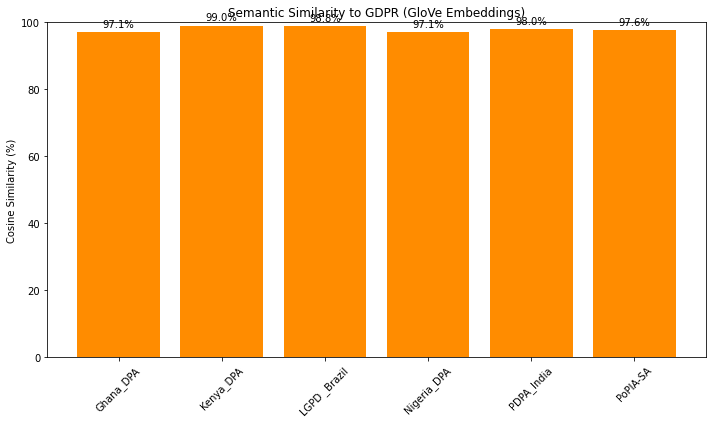

In [1]:
import os
import PyPDF2
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import AutoTokenizer, AutoModel
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')

# === Load Models ===
# LegalBERT for context retrieval
legalbert_tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
legalbert_model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased").eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
legalbert_model = legalbert_model.to(device)

# GloVe for similarity
glove_path = "glove.6B.100d.word2vec.txt"
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)

# === PDF Reader ===
def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# === LegalBERT Embedding ===
def get_legalbert_embedding(text):
    inputs = legalbert_tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = legalbert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# === GloVe Sentence Vector ===
def sentence_vector_glove(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in glove_model]
    if not valid_words:
        return np.zeros((glove_model.vector_size,))
    return np.mean([glove_model[w] for w in valid_words], axis=0)

# === Step 1: LegalBERT Context Retrieval ===
def semantic_search_legalbert(folder_path, user_query):
    query_vec = get_legalbert_embedding(user_query)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)
            if not sentences:
                continue

            sent_embeddings = [get_legalbert_embedding(s) for s in sentences]
            sent_embeddings = np.array(sent_embeddings)
            sims = cosine_similarity([query_vec], sent_embeddings)[0]
            best_idx = sims.argmax()
            start = max(0, best_idx - 3)
            end = min(len(sentences), best_idx + 4)
            context = " ".join(sentences[start:end])

            results[filename] = context

    return results

# === Step 2: GloVe-Based Similarity ===
def compare_context_with_query_glove(contexts, user_query):
    query_vec = sentence_vector_glove(user_query)
    sim_scores = {}

    for filename, context in contexts.items():
        context_vec = sentence_vector_glove(context)
        if np.linalg.norm(query_vec) == 0 or np.linalg.norm(context_vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([query_vec], [context_vec])[0][0]
        sim_scores[filename] = sim

    return sim_scores

# === Step 3: Plot Similarity to GDPR ===
def plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts):
    gdpr_file = next((f for f in relevance_scores if "gdpr" in f.lower()), None)
    if not gdpr_file:
        print("⚠️ GDPR file not found.")
        return

    gdpr_vec = sentence_vector_glove(retrieved_contexts[gdpr_file])

    similarities = {}
    for f, ctx in retrieved_contexts.items():
        vec = sentence_vector_glove(ctx)
        if np.linalg.norm(gdpr_vec) == 0 or np.linalg.norm(vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([gdpr_vec], [vec])[0][0]
        similarities[f] = sim

    labels = []
    values = []
    for f, sim in similarities.items():
        if f != gdpr_file:
            labels.append(f.replace(".pdf", ""))
            values.append(round(sim * 100, 2))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='darkorange')
    plt.title("Semantic Similarity to GDPR (GloVe Embeddings)")
    plt.ylabel("Cosine Similarity (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# === MAIN ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    user_query = input("Enter your search query: ").strip()

    retrieved_contexts = semantic_search_legalbert(folder, user_query)
    relevance_scores = compare_context_with_query_glove(retrieved_contexts, user_query)

    for file, score in relevance_scores.items():
        print(f"\n📄 File: {file}")
        print(f"🔍 Relevance Score (GloVe cosine similarity): {score:.4f}")
        print(f"🧠 Context:\n{retrieved_contexts[file]}\n")

    plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts)
#